# Part I: Linear Regression with One Variable

## Introduction
In this exercise, you will implement linear regression and get to see it work on data. Before starting on this programming exercise, go through the lectures.



## Introduction
In this exercise, you will implement linear regression and get to see it work on data. Before starting on this programming exercise, go through the lectures.


## Linear regression with one variable
In this part of this exercise, you will implement linear regression with one variable to predict proﬁts for a bakery franchise. 
Suppose you are the Chief Executive Officer of a bakery and are considering diﬀerent cities for opening a new outlet. The chain already has outlets in various cities and you have data for proﬁts and populations from the cities. You would like to use this data to help you select which city to expand to next.

The ﬁle ex1data1.txt contains the dataset for our linear regression problem. The ﬁrst column is the population of a city and the second column is the proﬁt of an outlet in that city. A negative value for proﬁt indicates a loss.


In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving ex1data1.txt to ex1data1.txt
Saving ex1data2.txt to ex1data2.txt
User uploaded file "ex1data1.txt" with length 1359 bytes
User uploaded file "ex1data2.txt" with length 657 bytes


## Plotting the Data
Before starting on any task, it is often useful to understand the data by visualizing it. For this dataset, you can use a scatter plot to visualize the data, since it has only two properties to plot (proﬁt and population). (Many other problems that you will encounter in real life are multi-dimensional and can’t be plotted on a 2-d plot.)
The plot should look like Figure 1, with the same red “x” markers and axis labels.


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
def get_data(filename, seperator):
  if filename[-4:]=='.txt':
    df = pd.read_csv(filename, sep=seperator, header=None)
    m = len(df)        
    X = df[df.columns[:-1]]
    y = df[df.columns[-1]].to_numpy().reshape(m,1)
    onez = np.ones((m,1))
    X = np.hstack((onez, X))
    return X, y, m

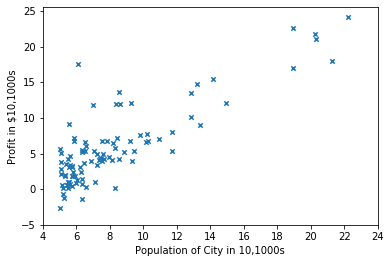

In [132]:
data = pd.read_csv('ex1data1.txt', sep=",", header=None)
data.columns = ["X", "y"]

data.plot(kind="scatter", x='X', y='y', marker='x')
plt.xlabel('Population of City in 10,1000s')
plt.ylabel('Profit in $10,1000s')

plt.xticks(np.arange(4, 25, 2))
plt.yticks(np.arange(-5, 26, 5))

plt.show()

## Gradient Descent

In this part, you will ﬁt the linear regression parameters θ to our dataset using gradient descent.

### Update Equations

The objective of linear regression is to minimize the cost function

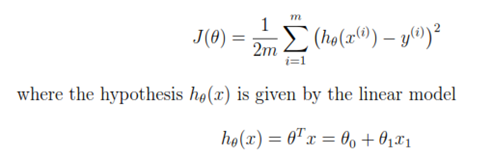


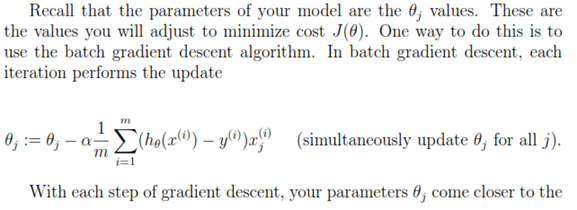
<br>
image.png



In [363]:
X, y, m = get_data('ex1data1.txt', ",")
print(X.shape)
print(theta)

(97, 2)
[[340412.56398002]
 [110540.95684122]
 [ -6559.38084291]]


In [0]:
def h_theta(X, theta):
  return np.dot(X, theta) 
def J(y_pred_minus_y, m):
  # (1 x 1) = (1 x m) x (m x 1)
  return ((1/(2*m)) * np.dot(y_pred_minus_y.T, y_pred_minus_y)[0] )

In [0]:
def update(y_pred_minus_y, theta, m, alpha):
  assert y_pred_minus_y.shape == (m,1)
  theta = theta - (alpha / m) * (np.dot( y_pred_minus_y.T, X).T) #this replaced all
  return theta

In [0]:
def predict(h_theta(), X):
  

In [0]:
def gradient_descent(X, y, alpha, n_iter, print_every=50, verbose=False):
  theta = np.random.rand(X.shape[1], 1)
  costs={}
  for it in range(n_iter+1):
    y_pred = h_theta(X, theta)
    #print(y_pred.shape)
    diff = y_pred - y
    #print(diff.shape)
    theta = update(diff, theta, m, alpha)
    #print(theta.shape)
    costs[it] = J(diff, m)
    if (verbose==True and it % print_every==0):
      print("Iter# %d Cost: %f "%(it, costs[it]))
  return costs, theta

In [364]:
costs = {}
costs, theta = gradient_descent(X, y, 0.01, 1500, 50, True)

Iter# 0 Cost: 25.341734 
Iter# 50 Cost: 5.714609 
Iter# 100 Cost: 5.510297 
Iter# 150 Cost: 5.339713 
Iter# 200 Cost: 5.197289 
Iter# 250 Cost: 5.078378 
Iter# 300 Cost: 4.979096 
Iter# 350 Cost: 4.896204 
Iter# 400 Cost: 4.826996 
Iter# 450 Cost: 4.769213 
Iter# 500 Cost: 4.720969 
Iter# 550 Cost: 4.680689 
Iter# 600 Cost: 4.647059 
Iter# 650 Cost: 4.618981 
Iter# 700 Cost: 4.595537 
Iter# 750 Cost: 4.575964 
Iter# 800 Cost: 4.559622 
Iter# 850 Cost: 4.545978 
Iter# 900 Cost: 4.534586 
Iter# 950 Cost: 4.525075 
Iter# 1000 Cost: 4.517134 
Iter# 1050 Cost: 4.510504 
Iter# 1100 Cost: 4.504968 
Iter# 1150 Cost: 4.500346 
Iter# 1200 Cost: 4.496488 
Iter# 1250 Cost: 4.493266 
Iter# 1300 Cost: 4.490576 
Iter# 1350 Cost: 4.488330 
Iter# 1400 Cost: 4.486455 
Iter# 1450 Cost: 4.484889 
Iter# 1500 Cost: 4.483582 


## Plotting Costs against Iterations

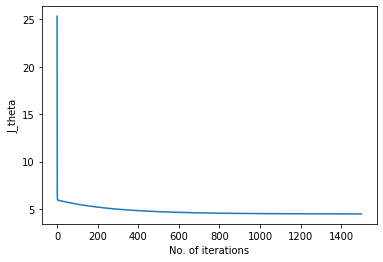

In [365]:
okX, oky = zip(*costs.items())
plt.ylabel("J_theta")
plt.xlabel("No. of iterations")
plt.plot(okX, oky)
plt.show()

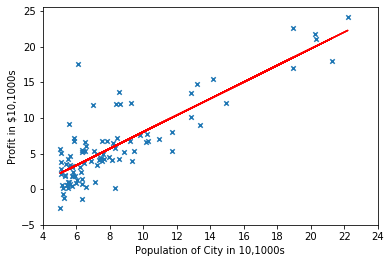

In [366]:
data.plot(kind="scatter", x='X', y='y', marker='x')
plt.xlabel('Population of City in 10,1000s')
plt.ylabel('Profit in $10,1000s')

plt.plot(X[:,1], h_theta(X, theta), color='r')

plt.xticks(np.arange(4, 25, 2))
plt.yticks(np.arange(-5, 26, 5))

plt.show()


In [0]:
#pd.read_csv()
#data.head()
#data.info()
#data.columns
#data.describe()
#data.y.value_counts()
#data.X.plot('hist', bins=20)


# Part II: Linear Regression with Multiple Variables

1. Linear regression with multiple variables
In this part, you will implement linear regression with multiple variables to predict the prices of houses. Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to ﬁrst collect information on recent houses sold and make a model of housing prices.
The ﬁle ex1data2.txt contains a training set of housing prices in a city. The ﬁrst column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price of the house.

## 1.1 Feature Normalization
By looking at the data values, note that house sizes are about 1000 times the number of bedrooms. When features diﬀer by orders of magnitude, ﬁrst performing feature scaling can make gradient descent converge much more quickly.

Your task here is to:
*   Subtract the mean value of each feature from the dataset.
*   After subtracting the mean, additionally scale (divide) the feature values by their respective “standard deviations.”



**Implementation Note**: When normalizing the features, it is important to store the values used for normalization - the mean value and the standard deviation used for the computations. After learning the parameters from the model, we often want to predict the prices of houses we have not seen before. Given a new x value (living room area and number of bedrooms), we must ﬁrst normalize x using the mean and standard deviation that we had previously computed from the training set.


In [417]:
X, y, m = get_data('ex1data2.txt', ",")
print(X.shape)
print(theta)

(47, 3)
[[89597.9095428 ]
 [  139.21067402]
 [-8738.01911233]]


In [0]:
#Normalization
X_df = pd.DataFrame(X)
X_stats = X_df.describe().to_dict()
for each in X_df.keys()[1:]:
  X_df[each] = (X_df[each] - X_stats[each]['mean']) / X_stats[each]['std']
X = X_df.to_numpy()

## 1.2 Gradient Descent
Previously, you implemented gradient descent on a univariate regression problem. The only diﬀerence now is that there is one more feature in the matrix X. The hypothesis function and the batch gradient descent update rule remain unchanged.
You should implement the cost function and gradient descent for linear regression with multiple variables. If your code in the previous part (single variable) already supports multiple variables, you can use it here too. 
Make sure your code supports any number of features and is well-vectorized

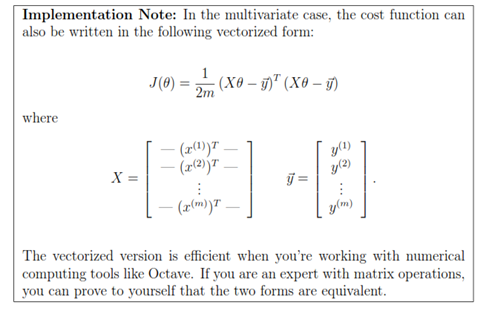

In [427]:
costs = {}
costs, theta = gradient_descent(X, y, alpha, 100, 10, True)

Iter# 0 Cost: 65591387507.392563 
Iter# 10 Cost: 9851641624.154226 
Iter# 20 Cost: 3159719552.441579 
Iter# 30 Cost: 2253141678.687876 
Iter# 40 Cost: 2099704199.793619 
Iter# 50 Cost: 2062961579.608071 
Iter# 60 Cost: 2050988974.388016 
Iter# 70 Cost: 2046421348.124247 
Iter# 80 Cost: 2044575769.804459 
Iter# 90 Cost: 2043816446.610009 
Iter# 100 Cost: 2043502342.363536 


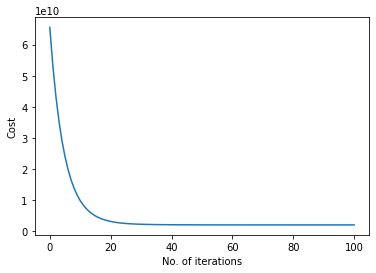

In [429]:
okX, oky = zip(*costs.items())
plt.ylabel("Cost")
plt.xlabel("No. of iterations")
plt.plot(okX, oky)
plt.show()

## 3.2.1 Selecting learning rates



In this part of the exercise, you will get to try out diﬀerent learning rates for the dataset and ﬁnd a learning rate that converges quickly. 
Run gradient descent for about 50 iterations at the chosen learning rate. After the last iteration, implement the script that plots the J values against the number of the iterations.
If you picked a learning rate within a good range, your plot look similar Figure 4. If your graph looks very diﬀerent, especially if your value of J(θ) increases or even blows up, adjust your learning rate and try again. We recommend trying values of the learning rate a on a log-scale, at multiplicative steps of about 3 times the previous value (i.e., 0.3, 0.1, 0.03, 0.01 and so on). You may also want to adjust the number of iterations you are running if that will help you see the overall trend in the curve.


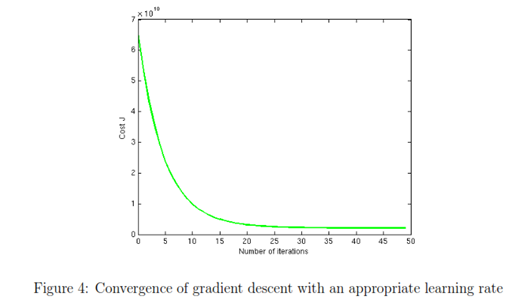

Notice the changes in the convergence curves as the learning rate changes. With a small learning rate, you should ﬁnd that gradient descent takes a very long time to converge to the optimal value. Conversely, with a large learning rate, gradient descent might not converge or might even diverge!

Using the best learning rate that you found, run gradient descent until convergence to ﬁnd the ﬁnal values of θ. Next, use this value of θ to predict the price of a house with 1650 square feet and 3 bedrooms. You will use value later to check your implementation of the normal equations. Don’t forget to normalize your features when you make this prediction!


In [425]:
learning_rates = np.geomspace(0.001, 0.1, 5)
print(learning_rates)
multicosts = {}
for alpha in learning_rates:
  multicosts[alpha], _ = gradient_descent(X, y, alpha, 50)

[0.001      0.00316228 0.01       0.03162278 0.1       ]


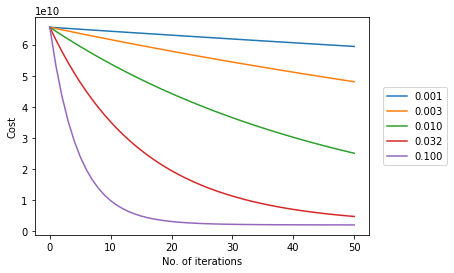

In [426]:
for alpha in multicosts.keys():
  okX, oky = zip(*multicosts[alpha].items())
  plt.ylabel("Cost")
  plt.xlabel("No. of iterations")
  plt.plot(okX, oky, label='%.3f'%alpha)
#plt.legend(loc="right")
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
plt.show()

## Making Predictions
House with 1650 sq. ft. area and 3 rooms

In [0]:
x1 = (1650 - X_stats[1]['mean']) / X_stats[1]['std']
x2 = (3 - X_stats[2]['mean']) / X_stats[2]['std']

In [439]:
prediction = h_theta(np.array([1, x1,x2]), theta)
print('Predicted price of house with 1650 sq ft. and 3 rooms is $%.4f' % prediction)

Predicted price of house with 1650 sq ft. and 3 rooms is $293222.9127


#Part III: Normal Equations
We know that the closed-form solution to linear regression is


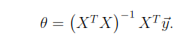

Using this formula does not require any feature scaling, and you will get an exact solution in one calculation: there is no “loop until convergence” like in gradient descent.
Implement the code to use the formula above to calculate θ. Remember that while you don’t need to scale your features, we still need to add a columns of 1’s to the X matrix to have an intercept term (θ).

Now, once you have found θ using this method, use it to make a price prediction for a 1650-square-foot house with 3 bedrooms. You should ﬁnd that gives the same predicted price as the value you obtained using the model ﬁt with gradient descent.


In [0]:
X, y, m = get_data('ex1data2.txt', ",")

In [0]:
theta = np.dot(np.dot( np.linalg.inv(np.dot(X.T,X)), X.T),y)

In [433]:
print(theta)

[[340404.5219307 ]
 [109943.61387388]
 [ -5962.04348757]]


## Making Predictions
House with 1650 sq. ft. area and 3 rooms

In [0]:
x1 = (1650 - X_stats[1]['mean']) / X_stats[1]['std']
x2 = (3 - X_stats[2]['mean']) / X_stats[2]['std']

In [438]:
prediction = h_theta(np.array([1, x1,x2]), theta)
print('Predicted price of house with 1650 sq ft. and 3 rooms is $%.4f' % prediction)

Predicted price of house with 1650 sq ft. and 3 rooms is $293222.9127
